In [1]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt


filename = 'df_imputed_scaled_OHE_reducedv1.pkl'
df = pd.read_pickle(filename)

In [9]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.ensemble import VotingClassifier



X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])


#train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.2, random_state=45)






In [11]:
#Building Models according to the best hyperparameters
#found by RandomSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
import xgboost as xg
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
XGB_clf = xg.XGBClassifier(subsample = 0.7,
                           reg_alpha =  10.0, 
                           learning_rate =0.1, 
                           gamma=0.2, 
                           colsample_bytree =  0.8 ,
                           objective= 'binary:logistic',
                           nthread=4, 
                           scale_pos_weight=1, 
                           seed=27, 
                           n_estimators = 80, 
                           max_depth = 3,
                           min_child_weight = 3)
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 1, solver = 'lbfgs') 
model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
AdaBoost_DT_model = AdaBoostClassifier(base_estimator= model_Decision_Tree, n_estimators =  900, learning_rate = 0.001, random_state = 34)
AdaBoost_Logistic_Regression_model = AdaBoostClassifier(base_estimator=model_Logistic_Regression,  n_estimators =  1000, learning_rate = 0.01, random_state = 38)
grad_boosting_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=5, min_samples_split=600, min_samples_leaf=40, subsample=0.75, random_state=10,max_features = 3)
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}


#Building Models according to the best hyperparameters
#found by RandomSearchCV

model_Linear_SVM=svm.SVC(kernel='linear',C=0.1,gamma=1e-05, probability=True)

model_RBF_SVM = svm.SVC(kernel='rbf',C=10,gamma=0.01, probability=True)
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 1, solver = 'lbfgs') 


model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

'''
-- Best Parameters: DT_randomSEARCH
parameters: max_depth            setting: 1
parameters: min_samples_split    setting: 4
parameters: max_leaf_nodes       setting: 8
parameters: min_samples_leaf     setting: 13
parameters: criterion            setting: gini
'''

    
    
model_RandomForest = RandomForestClassifier(n_estimators= 600,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)

model_KNN = KNeighborsClassifier(n_neighbors=22)


voting_clf=VotingClassifier(estimators=[('KNN',model_KNN),
                                              ('RBF',model_RBF_SVM),
                                              ('RFor',model_RandomForest),
                                              ('LR',model_Logistic_Regression),
                                              ('DT',model_Decision_Tree),
                                              ('svm',model_Linear_SVM)
                                             ],voting='soft')


In [12]:
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML

scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}
print('paso1')
kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['AdaBoost - DT','AdaBoost - LR','Gradient Tree Boosting','XGBoost', 'Voting \n Classifier']
models=[AdaBoost_DT_model, AdaBoost_Logistic_Regression_model, grad_boosting_model, XGB_clf, voting_clf]

fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []



print('paso2')


for i in models:
    model = i
    print('paso3')
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    print('paso4')
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)



#new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
#new_models_dataframe2

paso1
paso2
paso3
paso4
Model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.001, n_estimators=900, random_state=34)
paso3
paso4
Model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.01, n_estimators=1000, random_state=38)
paso3
paso4
Model: GradientBoostingClassifier(criterion='friedman_mse', init=No

,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
AdaBoost - DT,0.781468,0.048331,0.801690,0.008362
AdaBoost - LR,0.792302,0.051406,0.803984,0.006085
Gradient Tree Boosting,0.792290,0.064569,0.812317,0.009334
XGBoost,0.795516,0.062917,0.827898,0.006431
Voting \n Classifier,0.792290,0.057977,0.827655,0.007178


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
AdaBoost - DT,0.804607,0.038315,0.823456,0.008499
AdaBoost - LR,0.813710,0.042367,0.823997,0.005087
Gradient Tree Boosting,0.818352,0.049432,0.835145,0.007957
XGBoost,0.820520,0.047810,0.848689,0.006112
Voting \n Classifier,0.819672,0.041219,0.849454,0.006288


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
AdaBoost - DT,0.802777,0.059967,0.811298,0.009500
AdaBoost - LR,0.819200,0.074648,0.818818,0.007984
Gradient Tree Boosting,0.806656,0.079782,0.812494,0.010767
XGBoost,0.811740,0.078738,0.826205,0.006031
Voting \n Classifier,0.803674,0.077880,0.821982,0.006643


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
AdaBoost - DT,0.809529,0.039878,0.836278,0.017158
AdaBoost - LR,0.821490,0.091199,0.829295,0.005596
Gradient Tree Boosting,0.839098,0.068762,0.859200,0.009590
XGBoost,0.839098,0.072038,0.872517,0.010702
Voting \n Classifier,0.844980,0.058270,0.878845,0.007099


,Fit_time,Scoring Time
AdaBoost - DT,1.535792,0.310508
AdaBoost - LR,3.839715,0.330011
Gradient Tree Boosting,0.042498,0.003312
XGBoost,0.028786,0.005347
Voting \n Classifier,1.187977,0.194576


In [8]:
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.ensemble import VotingClassifier

#Building Models according to the best hyperparameters
#found by RandomSearchCV

model_Linear_SVM=svm.SVC(kernel='linear',C=0.1,gamma=1e-05, probability=True)

model_RBF_SVM = svm.SVC(kernel='rbf',C=10,gamma=0.01, probability=True)
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 1, solver = 'lbfgs') 


model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

'''
-- Best Parameters: DT_randomSEARCH
parameters: max_depth            setting: 1
parameters: min_samples_split    setting: 4
parameters: max_leaf_nodes       setting: 8
parameters: min_samples_leaf     setting: 13
parameters: criterion            setting: gini
'''

    
    
model_RandomForest = RandomForestClassifier(n_estimators= 600,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)

model_KNN = KNeighborsClassifier(n_neighbors=22)

kfold = StratifiedKFold(n_splits=10, random_state=1)
voting_clf=VotingClassifier(estimators=[('KNN',model_KNN),
                                              ('RBF',model_RBF_SVM),
                                              ('RFor',model_RandomForest),
                                              ('LR',model_Logistic_Regression),
                                              ('DT',model_Decision_Tree),
                                              ('svm',model_Linear_SVM)
                                             ],voting='soft')


print('paso1')
kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Voting Classifier']
models=[voting_clf]

fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []



print('paso2')


for i in models:
    model = i
    print('paso3')
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    print('paso4')
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)



#new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
#new_models_dataframe2

paso1
paso2
paso3
paso4
Model: VotingClassifier(estimators=[('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')), ('RBF', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)


,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Voting Classifier,0.797737,0.055094,0.827657,0.005575


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Voting Classifier,0.82342,0.041815,0.849039,0.00495


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Voting Classifier,0.808259,0.073056,0.823704,0.005443


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Voting Classifier,0.846941,0.062323,0.876009,0.00647


,Fit_time,Scoring Time
Voting Classifier,1.136681,0.187983


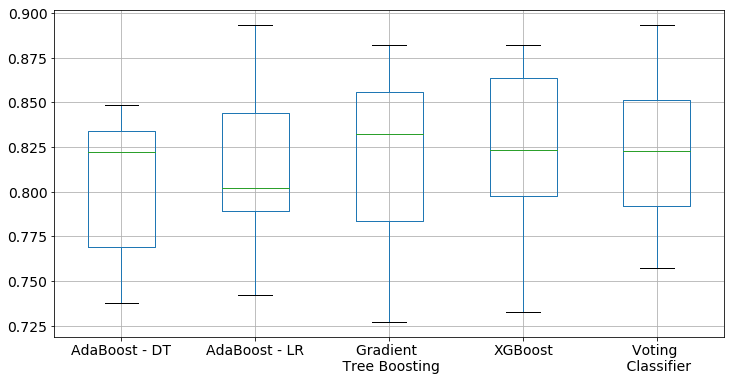

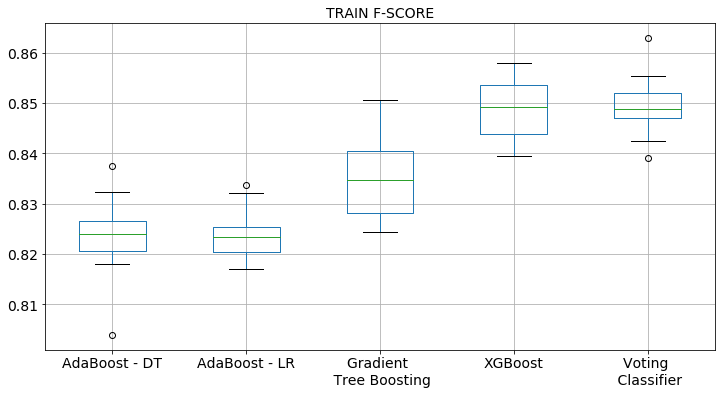

In [14]:
classifiers=['AdaBoost - DT','AdaBoost - LR','Gradient \n Tree Boosting','XGBoost', 'Voting \n Classifier']
plt.figure(figsize=(12,6))
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers][0])
box_test_F_score.T.boxplot(fontsize=14)

plt.show()

plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE', fontsize=14)
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers][0])
box_train_F_score.T.boxplot(fontsize=14)


plt.show()



[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]


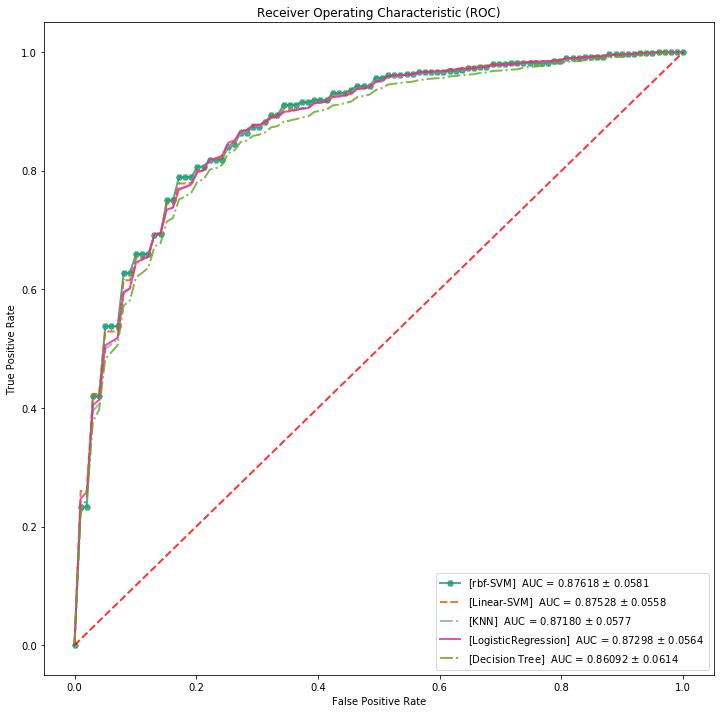

,AUC Mean,std
rbf-SVM,0.876178,0.058087
Linear-SVM,0.875281,0.055777
KNN,0.871800,0.057668
LogisticRegression,0.872977,0.056359
Decision Tree,0.860915,0.061437


In [10]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#'aqua', 'darkorange', 'cornflowerblue'
models = [
    {
        'label' : 'rbf-SVM',
        'model': model_RBF_SVM,
        'color': '#1b9e77',
        'linestyle': 'solid', 
        'markers': 'H',
         
    },
    {
        'label' : 'Linear-SVM',
        'model': model_Linear_SVM,
        'color': '#d95f02',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'KNN',
        'model': model_KNN, 
        'color': '#8da0cb',
        'linestyle': 'dashdot',
        'markers': '',
    },    
    
    {
        'label' : 'LogisticRegression',
        'model': model_Logistic_Regression,
        'color': '#e7298a',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': model_Decision_Tree, 
        'color': '#66a61e',
        'linestyle': '-.',
        'markers': ''
    },

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
splits = 10
cv = StratifiedKFold(n_splits=splits)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
std_mean = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for i,(train_index, test_index) in enumerate(cv.split(X, y)):
        
        print('[Fold %d/%d]' % (i + 1, splits))
        #print("TRAIN:", train_index, "\nTEST:", test_index)
        train_X = X.iloc[train_index]
        train_y = y.iloc[train_index]
        test_X = X.iloc[test_index]
        test_y = y.iloc[test_index]
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)

    aucs_mean.append(mean_auc)
    std_mean.append(std_auc)
    labels.append(m['label']) 
    



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
plt.show()
AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':std_mean },index = labels)       
AUCs



In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.ensemble import VotingClassifier
train_X,test_X,train_Y,test_Y =train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]

kfold = StratifiedKFold(n_splits=10, random_state=1)
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',model_KNN),
                                              ('RBF',model_RBF_SVM),
                                              ('RFor',model_RandomForest),
                                              ('LR',model_Logistic_Regression),
                                              ('DT',model_Decision_Tree),
                                              ('svm',model_Linear_SVM)
                                             ], 
                       voting='soft').fit(X,y)
#print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = kfold,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The cross validated score is 0.7912036537562485


In [ ]:
df.info()

In [ ]:
from sklearn.cluster import FeatureAgglomeration
correlations =df.corr()

def extract_numerical_features(df):
    df = df.copy()
    # Identify numerical columns which are of type object
    numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

    for feature in df.columns:
        if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
            numerical_features[feature] = 1
    return numerical_features[numerical_features == 1].index

num_features = extract_numerical_features(df)
df_aglo = pd.DataFrame(data=df.values, columns=df.columns)


df_total = df_aglo[X.columns]

plt.figure(figsize=(20, 12))
top_features = 10

correlation_coeff = np.corrcoef(df_total.astype(float).values.T)
sns.set(font_scale=1.20)
coeff_heatmap = sns.heatmap(correlation_coeff, annot=True, cmap='YlGn', cbar=True,
                            square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df_total.columns, xticklabels=df_total.columns)
plt.show()



number_of_clusters=int(df_total.shape[1]/1.2)
# Create Dendrogram
agglomerated_features = FeatureAgglomeration(n_clusters=number_of_clusters)
used_networks = np.arange(0, number_of_clusters, dtype=int)
# used_networks = np.unique(agglomerated_features.labels_)

# In our case all columns are clustered, which means used_columns is true in every element
# used_columns = (df.columns.get_level_values(None)
                # .astype(int)
                # .isin(used_networks))
# used_columns = (agglomerated_feature_labels.astype(int).isin(used_networks))
# df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, df_total.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_total.columns.get_level_values(None)
network_colors = pd.Series(networks, index=df_total.columns).map(network_lut)
sns.set(font="monospace")
# Create custom colormap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cg = sns.clustermap(df_total.astype(float).corr(), cmap=cmap, linewidths=.5,
                    row_colors=network_colors, col_colors=network_colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()




